# (Covid-19 effect on Ford bay wheel Rides)
## by (Maha Ezzat)

## Investigation Overview

> This presentaion address the effect of Covid-19 on using bike rental service by ford bay wheel.

## Dataset Overview

> This document address a dataset containing trips start dates and other attributes for approximately 4 million ride.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
#load data scv file
df_full = pd.read_csv('baywheels.csv')
ind_neg_duration = [i for i, s in enumerate(df_full['duration_min']) if s < 0]
df_full.drop(ind_neg_duration, axis=0, inplace=True)

#Construct our data of interst
df = df_full[['year', 'month', 'day', 'hour', 'duration_min', 'user_type']].copy()

order_val = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df['day_num'] = pd.Categorical(df['day'], categories=order_val).codes

df['user_type_num'] = pd.Categorical(df['user_type'], categories=['Subscriber', 'Customer']).codes

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Trips duration at weekends and weekdays in each year

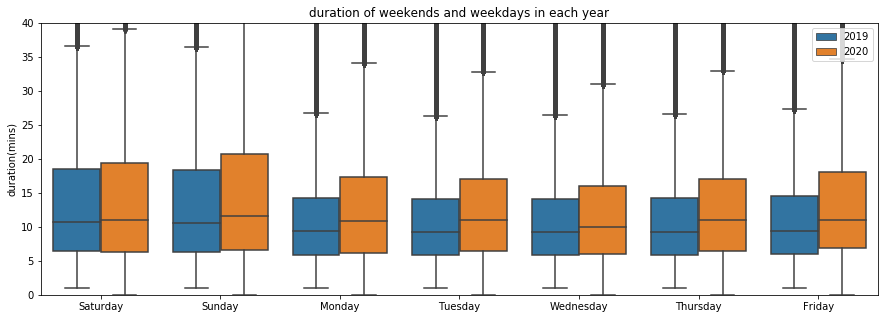

In [3]:
order_val = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

fig= plt.subplots(figsize = [15,5])

sb.boxplot(data = df, x='day', y='duration_min', hue='year', order=order_val);
plt.title('duration of weekends and weekdays in each year');
plt.ylabel('duration(mins)');
plt.ylim([0, 40]);
plt.xlabel('');
plt.legend(loc='upper right');

The average duration in min for all days of 2020 are greater that in 2019. The range and the average of duration in weekends are greater than that in weekdays in both 2019 and 2020.

## User type counts for each month in year

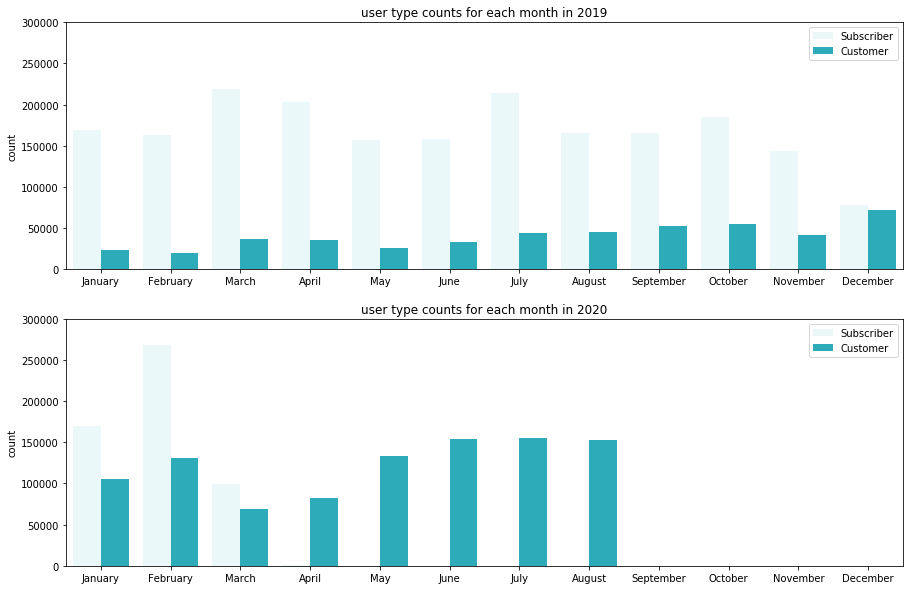

In [4]:
df_2019 = df[df['year'] == 2019]
df_2020 = df[df['year'] == 2020]

color_palt = sb.color_palette()[9]

fig, ax = plt.subplots(nrows = 2, figsize = [15,10])
order_val = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
             'November', 'December']

sb.countplot(data=df_2019, x='month', hue='user_type', hue_order = ['Subscriber', 'Customer'], ax=ax[0], order=np.arange(1,13,1), color=color_palt);
ax[0].set_title('user type counts for each month in 2019');
ax[0].set_xticklabels(order_val);
ax[0].legend(loc='upper right');
ax[0].set_xlabel('');
ax[0].set_ylim([0, 300000]);


sb.countplot(data=df_2020, x='month', hue='user_type', hue_order = ['Subscriber', 'Customer'], ax=ax[1],  order=np.arange(1,13,1), color=color_palt);
ax[1].set_title('user type counts for each month in 2020');
ax[1].set_xticklabels(order_val);
ax[1].legend(loc='upper right');
ax[1].set_xlabel('');
ax[1].set_ylim([0, 300000]);

fig.show();


In 2019: Subscribers are more than Customers in all months.

In 2020: The Subsciber rides increased dramatically on January and Februray which considered the Covid-19 start period. Starts to decrease in March, and almost no Subscribers ride starting from April due to the quarantine.

## Rides Starting hours for each day in each year



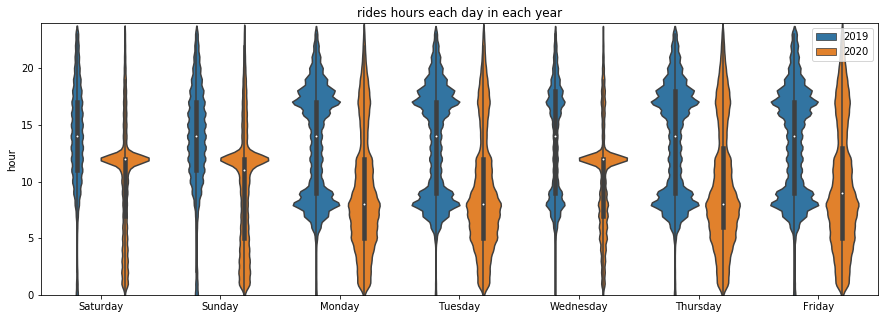

In [5]:
order_val = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

fig= plt.subplots(figsize = [15,5])

sb.violinplot(data=df, x='day', y='hour', order=order_val, hue='year');
plt.title('rides hours each day in each year');
#plt.ylabel('duration(mins)');
plt.ylim([0, 24]);
plt.xlabel('');
plt.legend(loc='upper right');

In 2019, on average the rides on weekdays starts at 7-8 am and 5 pm which is the start and end hours of the employees. 
At weekend, the rides starts from around 7 to 12 am with a normal distrubtuion with a mean around 2 pm

In 2020, the rides start on average at 12pm on weekends. The rides start on average on 7-8 am and smaller portion starts at 5 pm at weekdays. Except for Wednesdays, it's much like the weekends which the rides start on average at 12pm.

## Conclusion

#### It's observed that Covid-19 has significant effect on the rides, and the behavior observed for 2020 is different that in 2019. The following is the observed differences between 2019 and 2020: 

>1-    The average duration in min for all days of 2020 are greater that in 2019. This shows that there is a correlation between Covid-19 and increase of the ride duration.

>2-    The Subsciber rides increased dramatically on January and Februray which considered the Covid-19 start period. Starts to decrease in March, and almost no Subscribers ride starting from April due to the quarantine.

>3-    The rides start on average at 12pm on weekends. The rides start on average on 7-8 am and smaller portion starts at 5 pm at weekdays, that suggests that may be the employees return to their homes walking. Except for Wednesdays, it's much like the weekends which the rides start on average at 12pm.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [6]:
! jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 457643 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Mah\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Mah\Anaconda3\lib\site-packages\jupyter_core\application.py", line 267, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Mah\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Mah\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\Mah\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users